## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import re
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading Train and Test Data

In [ ]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')
train.head()

In [ ]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'])
test.head()

## Understanding Data

In [ ]:
# data.sort_values(by='Date_of_Journey',inplace=True)

In [ ]:
train.shape, test.shape

(10683, 11)

In [ ]:
train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
train['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [ ]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
train['Date_of_Journey'].nunique()

40

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


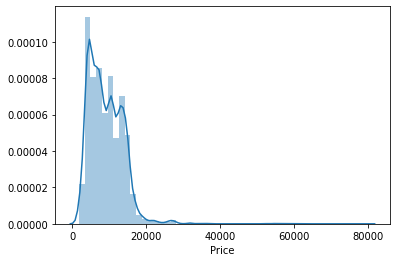

In [ ]:
sns.distplot(train['Price'])     # Visualizing the distribution of Flight ticket price

In [ ]:
train[train['Additional_Info']=='No info'].shape

(8345, 11)

## Preprocessing the data

In [ ]:
# duration_list=[]
# for i in data['Duration']:
#     i=i.split()
#     m = []
#     for j in i:
#         j = re.sub("\D", "", j)
#         m.append(int(j))
#     duration_list.append(m)
# duration_list
# final_duration=[]
# for i in duration_list:                             # before creating and applying the fuction for to convert Duration into only minutes, checking the 
#     hr = i[0]*60                                    # logic is working or not
#     if len(i)==1:
#         i.append(0)
#     minutes = hr+i[1]
#     final_duration.append(minutes)
# final_duration = pd.Series(final_duration)
# final_duration
    

In [ ]:
#Function for to convert Duration into only minutes

def dur(a):
    a = a.split()
    a[0] = re.sub("\D", "", a[0])
    a[0] = int(a[0])*60
    if len(a)==1:
        a.append('0')
    a[1] = re.sub("\D",'', a[1])
    return a[0]+int(a[1])
train['Duration'].apply(dur)        

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10683, dtype: int64

In [ ]:
train['Duration'] = train['Duration'].apply(dur)
test['Duration'] = test['Duration'].apply(dur)
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,655,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,240,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,1425,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,780,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,170,non-stop,No info


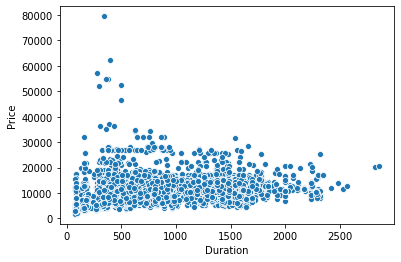

In [ ]:
sns.scatterplot('Duration','Price',data=data)        # Visualizing correlation between duration and price using scatterplot

In [ ]:
# checking null values in train and test data
train.isnull().sum()
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
# Filling null values using forward fill

train.ffill(axis=0,inplace=True)
test.ffill(axis=0,inplace=True)
# test.isnull().sum()

In [ ]:
# Splitting the Day and month from date of journey

train['month'] = pd.DatetimeIndex(train['Date_of_Journey']).month
train['day'] = pd.DatetimeIndex(train['Date_of_Journey']).day
test['month'] = pd.DatetimeIndex(test['Date_of_Journey']).month
test['day'] = pd.DatetimeIndex(test['Date_of_Journey']).day

In [ ]:
# Separating X and y variable for train a model

X_train = train.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Price'],axis=1)
X_test = test.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)
y_train = train['Price']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Applying One Hot Encoder

oh = OneHotEncoder(handle_unknown='ignore')
oh.fit(X_train)
X_train_oh = oh.transform(X_train).toarray()
X_test_oh = oh.transform(X_test).toarray()

# **Applying Different Models**

## **Linear Regression**

In [ ]:
linmodel = LinearRegression()
linmodel.fit(X_train_oh,y_train)
print('Train_score',linmodel.score(X_train_oh,y_train))
# print('Test_score',linmodel.score(X_test_oh,y_test))

Train_score 0.8223827951722672


## **Ridge Regression**

In [ ]:
param_grid = {'alpha':[0.01,0.1,1,10,100]}
ridgemodel = Ridge()
ridge_regressor = GridSearchCV(ridgemodel,param_grid)
ridge_regressor.fit(X_train_oh,y_train)
print('Train_score',ridge_regressor.score(X_train_oh,y_train))
# print('Test_score',ridge_regressor.score(X_test_oh,y_test))
print('best_parameters',ridge_regressor.best_params_)

Train_score 0.8203924783147255
best_parameters {'alpha': 1}


## **Lasso Regression**

In [ ]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
lassomodel = Lasso()
lasso_regressor = GridSearchCV(lassomodel,param_grid)
lasso_regressor.fit(X_train_oh,y_train)
print('Train_score',lasso_regressor.score(X_train_oh,y_train))
print('Test_score',lasso_regressor.score(X_test_oh,y_test))
print('best_parameters',lasso_regressor.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11884953182.544628, tolerance: 15091239.801531471
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11895694974.770584, tolerance: 14424711.828412488
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11387385653.413048, tolerance: 14117514.764398597
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did no

Train_score 0.8244040592362989
Test_score 0.8000595697114191
best_parameters {'alpha': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5336513961.660336, tolerance: 18191502.156380057
  max_iter, tol, rng, random, positive)


## **ElasticNet Regression**

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
ENmodel = ElasticNet()
en_regressor = GridSearchCV(ENmodel,param_grid)
en_regressor.fit(X_train_oh,y_train)
print('Train_score',en_regressor.score(X_train_oh,y_train))
print('Test_score',en_regressor.score(X_test_oh,y_test))
print('best_parameters',en_regressor.best_params_)

Train_score 0.8105930706667754
Test_score 0.7992480511312303
best_parameters {'alpha': 0.001}


## **Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_oh)
X_train_poly = poly.transform(X_train_oh)
X_test_poly = poly.transform(X_test_oh)


In [ ]:
ridgemodel = Ridge(alpha=10)
ridgemodel.fit(X_train_poly,y_train)
print('Train_score',ridgemodel.score(X_train_poly,y_train))
# print('Test_score',ridgemodel.score(X_test_poly,y_test))

Train_score 0.965166263257342


In [ ]:
pred_poly = ridgemodel.predict(X_test_poly)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_oh_model = RandomForestRegressor(criterion='friedman_mse',n_estimators=10000,max_depth=25,max_samples=0.99)
rf_oh_model.fit(X_train_oh,y_train)
print('Train_score',rf_oh_model.score(X_train_oh,y_train))
# print('Test_score',rf_oh_model.score(X_test_oh,y_test))


Train_score 0.9588450584968135


In [ ]:
pred_y = rf_oh_model.predict(X_test_oh)
# pred_y = pd.DataFrame(pred_y,columns=['Price'])


In [ ]:
# Storing test predictions as csv

import numpy as np
np.savetxt('predict_rf_flight3.csv',pred_y, delimiter=' ', newline='\n', header='Price', footer='', comments='# ', encoding=None)

In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [ ]:
#pred1=pred_y

In [ ]:
#(pred1-pred_poly).sum()

-189591.71078141904

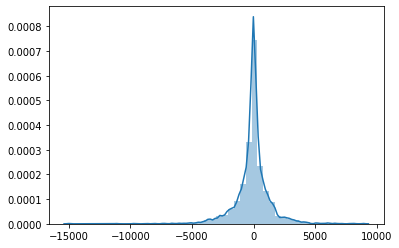

In [ ]:
#sns.distplot(pred1-pred_poly)

# **Feature Selection**

In [ ]:
X_train_oh = pd.DataFrame(X_train_oh)
X_test_oh = pd.DataFrame(X_test_oh)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
sel = SelectFromModel(RandomForestRegressor(criterion='friedman_mse',n_estimators=300,max_depth=25,max_samples=0.99))
sel.fit(X_train_oh, y_train)
sel.get_support()
selected_feat= X_train_oh.columns[(sel.get_support())]

In [ ]:
selected_feat

Int64Index([  0,   1,   3,   4,   5,   6,   8,  10,  15,  16,  17,  18,  20,
             22,  28,  46,  70,  93, 124, 125, 131, 132, 133, 137, 154, 157,
            191, 196, 198, 249, 508, 512, 516, 518, 521, 523, 524, 526, 527,
            528, 529, 530, 531, 532, 533, 535, 536],
           dtype='int64')

In [ ]:
# imp_feat_train = X_train_oh[[0,   1,   3,   4,   5,   6,   8,  10,  15,  16,  17,  18,  20,
#              22,  28,  46,  70,  93, 124, 125, 131, 132, 133, 137, 154, 157,
#             191, 196, 198, 249, 508, 512, 516, 518, 521, 523, 524, 526, 527,
#             528, 529, 530, 531, 532, 533, 535, 536]]
# imp_feat_test = X_test_oh[[0,   1,   3,   4,   5,   6,   8,  10,  15,  16,  17,  18,  20,
#              22,  28,  46,  70,  93, 124, 125, 131, 132, 133, 137, 154, 157,
#             191, 196, 198, 249, 508, 512, 516, 518, 521, 523, 524, 526, 527,
#             528, 529, 530, 531, 532, 533, 535, 536]]
imp_feat_train = sel.transform(X_train_oh)
imp_feat_test = sel.transform(X_test_oh)

In [ ]:
imp_feat_test.shape , imp_feat_train.shape

((2137, 47), (8546, 47))

## Linear Regression with Feature Selection

In [ ]:
linmodel = LinearRegression()
linmodel.fit(imp_feat_train,y_train)
print('Train_score',linmodel.score(imp_feat_train,y_train))
print('Test_score',linmodel.score(imp_feat_test,y_test))

Train_score 0.7725527150991025
Test_score 0.7637887496420014


## Ridge Regression with Feature Selection

In [ ]:
param_grid = {'alpha':[0.01,0.1,1,10,100]}
ridgemodel = Ridge()
ridge_regressor = GridSearchCV(ridgemodel,param_grid)
ridge_regressor.fit(imp_feat_train,y_train)
print('Train_score',ridge_regressor.score(imp_feat_train,y_train))
print('Test_score',ridge_regressor.score(imp_feat_test,y_test))
print('best_parameters',ridge_regressor.best_params_)

Train_score 0.7730048826286695
Test_score 0.7649055372924877
best_parameters {'alpha': 0.1}


## KNN with Feature Selection

In [ ]:
param_grid = {'n_neighbors':[5,10,15,20,25,30]}
knnmodel = KNeighborsRegressor()
knn_regressor = GridSearchCV(knnmodel,param_grid)
knn_regressor.fit(imp_feat_train,y_train)
print('Train_score',knn_regressor.score(imp_feat_train,y_train))
print('Test_score',knn_regressor.score(imp_feat_test,y_test))
print('best_parameters',knn_regressor.best_params_)

Train_score 0.8588327979316792
Test_score 0.8413640009310583
best_parameters {'n_neighbors': 5}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_oh_model = RandomForestRegressor(criterion='friedman_mse',n_estimators=10000,max_depth=20,max_samples=0.99)
rf_oh_model.fit(imp_feat_train,y_train)
print('Train_score : ',rf_oh_model.score(imp_feat_train,y_train))
print('Test_score : ',rf_oh_model.score(imp_feat_test,y_test))

Train_score :  0.9116209310037963
Test_score :  0.8791092977105776


In [ ]:
Train_score 0.9115294858283706
Test_score 0.8789377740320559